### Data source
Telco Customer Churn: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [88]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [6]:
str_cols = list(df.dtypes[df.dtypes == 'object'].index)
str_cols.remove('customerid')
df['totalcharges'] = df['totalcharges'].str.lower().str.replace(' ', '')
str_cols.remove('totalcharges')
for col in str_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.head().T

,0,1,2,3,4
customerid,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [7]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)
df.totalcharges.isna().sum()

0

In [8]:
df.churn = (df.churn == 'yes').astype(int)

### Validation framework

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [12]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

 <b>Missing</b> : y feilds

### EDA

In [14]:
df_train_full.churn.value_counts(normalize=True)

churn
0    0.734469
1    0.265531
Name: proportion, dtype: float64

In [15]:
round(df_train_full.churn.mean(), 2)

0.27

In [16]:
df_train_full.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [17]:
numeric_cols = ['tenure', 'monthlycharges', 'totalcharges']

In [18]:
categorical_cols = ['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']

In [19]:
df_train_full[categorical_cols].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [20]:
for col in categorical_cols:
    print(col)
    print(df_train_full[col].unique().tolist())
    print()

gender
['female', 'male']

seniorcitizen
[0, 1]

partner
['no', 'yes']

dependents
['yes', 'no']

phoneservice
['yes', 'no']

multiplelines
['no', 'yes', 'no_phone_service']

internetservice
['dsl', 'fiber_optic', 'no']

onlinesecurity
['yes', 'no', 'no_internet_service']

onlinebackup
['no', 'yes', 'no_internet_service']

deviceprotection
['yes', 'no', 'no_internet_service']

techsupport
['no', 'yes', 'no_internet_service']

streamingtv
['no', 'yes', 'no_internet_service']

streamingmovies
['yes', 'no', 'no_internet_service']

contract
['one_year', 'two_year', 'month-to-month']

paperlessbilling
['no', 'yes']

paymentmethod
['mailed_check', 'bank_transfer_(automatic)', 'electronic_check', 'credit_card_(automatic)']



### Feature importance
* Churn rate
* Risk ratio

In [21]:
global_churn = df_train_full.churn.mean()
global_churn

0.2655307064252751

In [22]:
gender_male_churn_diff = df_train_full[df_train_full.gender == "male"].churn.mean() - global_churn
gender_female_churn_diff = df_train_full[df_train_full.gender == "female"].churn.mean() - global_churn
"gender", {"male": gender_male_churn_diff, "female": gender_female_churn_diff}

('gender', {'male': -0.005052701575950558, 'female': 0.005310210939122428})

In [23]:
gender_male_churn_rate = df_train_full[df_train_full.gender == "male"].churn.mean() / global_churn
gender_female_churn_rate = df_train_full[df_train_full.gender == "female"].churn.mean() / global_churn
"gender", {"male": gender_male_churn_rate, "female": gender_female_churn_rate}

('gender', {'male': 0.9809713097066141, 'female': 1.0199984815715346})

---

In [24]:
gender_has_dependents_churn_diff = df_train_full[df_train_full.dependents == "yes"].churn.mean() - global_churn
gender_no_dependents_churn_diff = df_train_full[df_train_full.dependents == "no"].churn.mean() - global_churn
'dependents', {"yes": gender_has_dependents_churn_diff, "no": gender_no_dependents_churn_diff}

('dependents', {'yes': -0.1098563154567665, 'no': 0.046795286994112395})

In [25]:
gender_has_dependents_churn_rate = df_train_full[df_train_full.dependents == "yes"].churn.mean() / global_churn
gender_no_dependents_churn_rate = df_train_full[df_train_full.dependents == "no"].churn.mean() / global_churn
'dependents', {"yes": gender_has_dependents_churn_rate, "no": gender_no_dependents_churn_rate}

('dependents', {'yes': 0.5862764162543967, 'no': 1.1762330527572389})

In [26]:
from IPython.display import display

In [27]:
for col in categorical_cols:
    specs = df_train_full.groupby(col)['churn'].agg(['mean', 'count'])
    specs['diff'] = specs['mean'] - global_churn
    specs['risk'] = specs['mean'] / global_churn
    display(specs)
    print()

,mean,count,diff,risk
gender,,,,
female,0.270841,2747,0.005310,1.019998
male,0.260478,2887,-0.005053,0.980971


,mean,count,diff,risk
seniorcitizen,,,,
0,0.237098,4728,-0.028433,0.892922
1,0.413907,906,0.148377,1.558793


,mean,count,diff,risk
partner,,,,
no,0.326446,2904,0.060916,1.229411
yes,0.200733,2730,-0.064798,0.755968


,mean,count,diff,risk
dependents,,,,
no,0.312326,3951,0.046795,1.176233
yes,0.155674,1683,-0.109856,0.586276


,mean,count,diff,risk
phoneservice,,,,
no,0.253623,552,-0.011908,0.955156
yes,0.266824,5082,0.001293,1.004871


,mean,count,diff,risk
multiplelines,,,,
no,0.251397,2685,-0.014134,0.946771
no_phone_service,0.253623,552,-0.011908,0.955156
yes,0.284105,2397,0.018574,1.069952


,mean,count,diff,risk
internetservice,,,,
dsl,0.191851,1939,-0.073679,0.722521
fiber_optic,0.415558,2481,0.150028,1.565010
no,0.076606,1214,-0.188924,0.288502


,mean,count,diff,risk
onlinesecurity,,,,
no,0.416014,2810,0.150484,1.566727
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.145342,1610,-0.120189,0.547363


,mean,count,diff,risk
onlinebackup,,,,
no,0.398693,2448,0.133162,1.501494
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.216531,1972,-0.048999,0.815467


,mean,count,diff,risk
deviceprotection,,,,
no,0.387706,2489,0.122175,1.460117
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.226825,1931,-0.038705,0.854234


,mean,count,diff,risk
techsupport,,,,
no,0.413472,2791,0.147941,1.557153
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.152855,1629,-0.112676,0.575657


,mean,count,diff,risk
streamingtv,,,,
no,0.335418,2239,0.069887,1.263197
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.298945,2181,0.033415,1.125841


,mean,count,diff,risk
streamingmovies,,,,
no,0.333333,2223,0.067803,1.255348
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.301320,2197,0.035789,1.134784


,mean,count,diff,risk
contract,,,,
month-to-month,0.426533,3083,0.161002,1.606340
one_year,0.117987,1212,-0.147544,0.444343
two_year,0.028379,1339,-0.237151,0.106878


,mean,count,diff,risk
paperlessbilling,,,,
no,0.16414,2309,-0.101390,0.618159
yes,0.33594,3325,0.070409,1.265164


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.174475,1238,-0.091056,0.657080
credit_card_(automatic),0.152404,1227,-0.113126,0.573961
electronic_check,0.449921,1887,0.184390,1.694420
mailed_check,0.190328,1282,-0.075203,0.716782


### Feature importance: Mutual importance

In [28]:
from sklearn.metrics import mutual_info_score

In [29]:
mutual_info_score(df_train_full.gender, df_train_full.churn)

6.877785208564413e-05

In [30]:
mutual_info_score(df_train_full.contract, df_train_full.churn)

0.0966515250997

In [31]:
def mutual_info(series: pd.Series):
    return mutual_info_score(series, df_train_full.churn)

In [32]:
mutual_importances = df_train_full[categorical_cols].apply(mutual_info)
mutual_importances.sort_values(ascending=False)

contract            0.096652
onlinesecurity      0.063393
techsupport         0.060935
internetservice     0.053313
onlinebackup        0.045424
paymentmethod       0.042861
deviceprotection    0.042007
streamingtv         0.030844
streamingmovies     0.030705
paperlessbilling    0.019077
dependents          0.014129
partner             0.010227
seniorcitizen       0.010059
multiplelines       0.000654
gender              0.000069
phoneservice        0.000040
dtype: float64

### Feature importance: Correlation

In [33]:
numeric_cols

['tenure', 'monthlycharges', 'totalcharges']

In [34]:
df_train_full[numeric_cols].corrwith(df_train_full.churn)

tenure           -0.344925
monthlycharges    0.188574
totalcharges     -0.193370
dtype: float64

In [35]:
df_train_full[df_train_full.tenure <= 2].churn.mean()

0.5863636363636363

In [36]:
df_train_full[(df_train_full.tenure > 2) & (df_train_full.tenure <= 12)].churn.mean()

0.4064814814814815

In [37]:
df_train_full[df_train_full.tenure > 12].churn.mean()

0.17205957883923986

D:\Apps\anaconda3\envs\tensorflow_p3_10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\envs\tensorflow_p3_10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='tenure'>

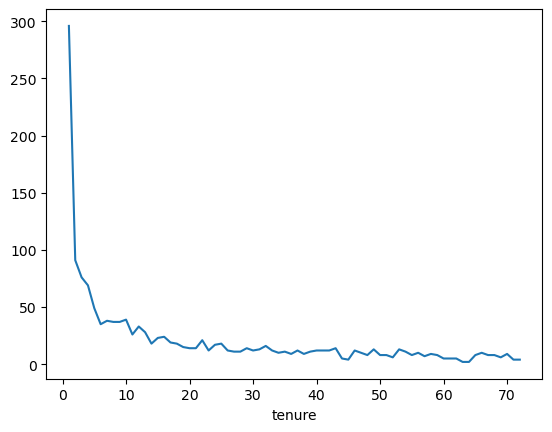

In [38]:
sum_by_tenure = df_train_full.groupby('tenure').churn.sum()
sns.lineplot(x=sum_by_tenure.index[1:], y=sum_by_tenure.values[1:])

D:\Apps\anaconda3\envs\tensorflow_p3_10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\envs\tensorflow_p3_10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='monthlycharges'>

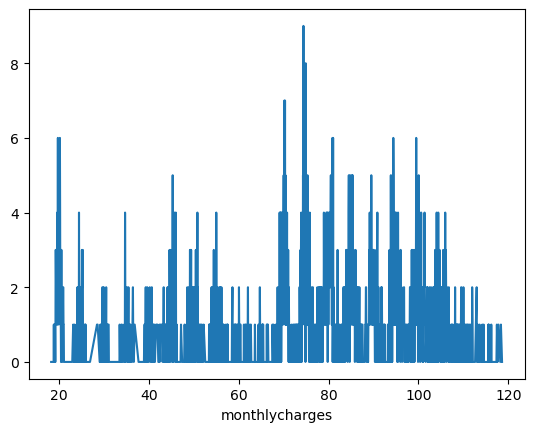

In [39]:
sum_by_monthlycharges = df_train_full.groupby('monthlycharges').churn.sum()
sns.lineplot(x=sum_by_monthlycharges.index, y=sum_by_monthlycharges.values)

In [40]:
df_train_full[df_train_full.monthlycharges  <= 20].churn.mean()

0.0912621359223301

In [41]:
df_train_full[(df_train_full.monthlycharges  > 20) & (df_train_full.monthlycharges  <= 50)].churn.mean()

0.19062027231467474

In [42]:
df_train_full[df_train_full.monthlycharges  > 50].churn.mean()

0.3152488806952857

D:\Apps\anaconda3\envs\tensorflow_p3_10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\envs\tensorflow_p3_10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='totalcharges'>

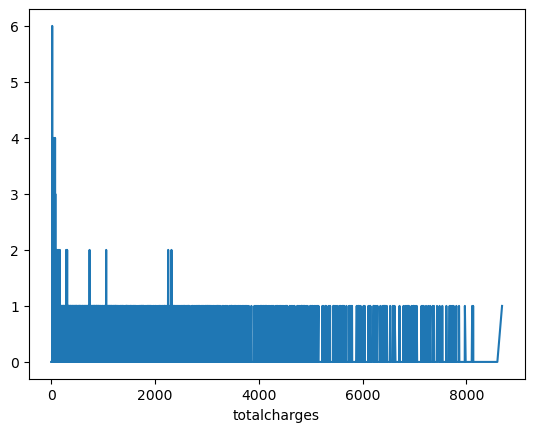

In [43]:
sum_by_totalcharges = df_train_full.groupby('totalcharges').churn.sum()
sns.lineplot(x=sum_by_totalcharges.index, y=sum_by_totalcharges.values)

### One-hot encoding

In [44]:
from sklearn.feature_extraction import DictVectorizer

In [45]:
dicts = df_train[['gender', 'contract']].iloc[:10].to_dict(orient='records')
dicts

[{'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'one_year'},
 {'gender': 'male', 'contract': 'month-to-month'}]

In [46]:
dv = DictVectorizer(sparse=False)

In [47]:
dv.fit(dicts)

DictVectorizer(sparse=False)

In [48]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [49]:
dv.transform(dicts)

array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.]])

In [50]:
 def one_hot_encoded_X(df: pd.DataFrame):
        dicts = df[categorical_cols + numeric_cols].to_dict(orient='records')
        dv = DictVectorizer(sparse=False)
        dv.fit(dicts)
        return dv.transform(dicts), dv

In [51]:
X_train, X_train_cols = one_hot_encoded_X(df_train)
y_train = df_train.churn
X_train.shape, y_train.shape

((4225, 45), (4225,))

In [52]:
X_val, X_valn_cols = one_hot_encoded_X(df_val)
y_val = df_val.churn

In [53]:
X_test, X_test_cols = one_hot_encoded_X(df_test)
y_test = df_test.churn

### Logistic Regression

In [54]:
z = np.linspace(-10, 10, 100)

In [55]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

D:\Apps\anaconda3\envs\tensorflow_p3_10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Apps\anaconda3\envs\tensorflow_p3_10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

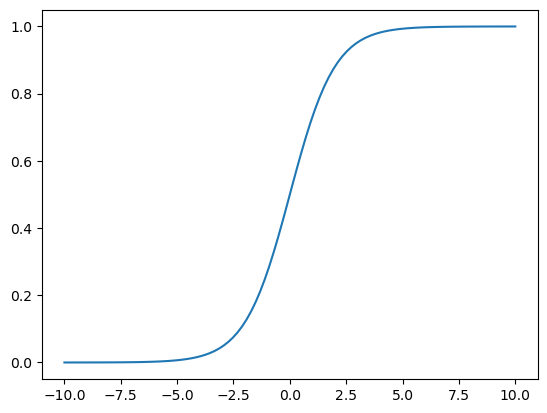

In [56]:
sns.lineplot(x=z, y=sigmoid(z))

### Logistic regression training

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train, )

LogisticRegression(max_iter=1000)

In [59]:
model.intercept_[0]

-0.15750126213360596

In [60]:
model.coef_[0].round(3)

array([ 0.653, -0.096, -0.71 , -0.048, -0.105,  0.016, -0.127, -0.042,
        0.019, -0.172, -0.354,  0.328, -0.127,  0.003, -0.231,  0.099,
       -0.022,  0.062, -0.127, -0.089,  0.186, -0.127, -0.213, -0.264,
        0.11 , -0.069, -0.084, -0.106, -0.181,  0.2  , -0.066,  0.099,
       -0.253,  0.154, -0.141, -0.127,  0.114, -0.072, -0.127,  0.045,
        0.142, -0.127, -0.169, -0.053,  0.   ])

In [61]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.15955755, 0.26083742, 0.4372947 , ..., 0.71525707, 0.04520755,
       0.03728185])

In [62]:
churn_decision = (y_pred >= 0.5).astype(int)

In [63]:
(y_val == churn_decision)

0        True
1        True
2       False
3        True
4        True
        ...  
1404    False
1405     True
1406     True
1407     True
1408     True
Name: churn, Length: 1409, dtype: bool

In [64]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision
df_pred['actual'] = y_val

In [65]:
df_pred['cor'] = (df_pred['prediction'] == df_pred['actual'])

In [66]:
incorrect = df_pred[df_pred.cor == False]
print(incorrect[incorrect['actual'] == 0].probability.max())
print(incorrect[incorrect['actual'] == 1].probability.min())

0.7945663786600294
0.013062438905615713


In [67]:
correct = df_pred[df_pred.cor == True]
print(correct[correct['actual'] == 0].probability.max())
print(correct[correct['actual'] == 1].probability.min())

0.4970291553485492
0.5001229941990962


### Model interpretation

In [68]:
X_train_cols

DictVectorizer(sparse=False)

In [69]:
df.from_dict([dict(zip(X_train_cols,  model.coef_[0]))]).T

TypeError: 'DictVectorizer' object is not iterable

In [ ]:
sigmoid(model.intercept_[0])

### Full Train

In [ ]:
dict_full_train = df_train_full[categorical_cols + numeric_cols].to_dict(orient='records')

In [ ]:
X_train_full,dv_train_full = one_hot_encoded_X(df_train_full)
y_train_full = df_train_full.churn

In [ ]:
X_train_full.shape, y_train_full.shape

In [ ]:
model_full = LogisticRegression(max_iter=1000)
model_full.fit(X_train_full, y_train_full)

In [ ]:
model_full.intercept_[0]

In [ ]:
model_full.coef_[0]

In [ ]:
X_test, X_test_cols = one_hot_encoded_X(df_test)
y_test = df_test.churn

In [ ]:
y_test_proba = model_full.predict_proba(X_test)[:,1]

In [ ]:
y_test_proba

In [ ]:
y_test_pred = (y_test_proba > 0.5).astype(int)

In [ ]:
y_test_pred

In [ ]:
(y_test == y_test_pred).mean()

In [ ]:
def predict(model: LogisticRegression, df: pd.DataFrame):
    X = dv_train_full.transform(df.to_dict(orient='records'))
    y = df.churn
    y_proba = model.predict_proba(X)[:,1]
    y_pred = (y_proba > 0.5).astype(int)
    return y_proba[0], y_pred[0]

In [ ]:
i=17
new_data = df_test.iloc[[i]]
new_data

In [ ]:
predict(model_full, new_data), new_data.churn.values[0]